In [ ]:
!pip install qiskit[visualization]==1.1.0
# Use the following if you are on MacOS/zsh
#!pip install 'qiskit[visualization]'==1.1.0
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install networkx
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=92e9bf6eefdc564e7da34b2be215536edd7fbdb69a570da5bb0150fdddd5b124
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 2.4 MB/s eta 0:00:00
  Installing build dependenci

In [ ]:
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 64.7 MB/s eta 0:00:00


In [ ]:

from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import CouplingMap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.synthesis import LieTrotter

from qiskit_ibm_runtime.options import EstimatorOptions, DynamicalDecouplingOptions
from qiskit_ibm_runtime import EstimatorV2, Batch

import numpy as np
import matplotlib.pyplot as plt
import json

In [ ]:
%set_env QXToken=

env: QXToken=085e882ff1cc6cc4485a7fafc0d8bd7e4973d70d7d5957a83a61511fd42a03e7513fde522a110d938743f24d2da12703eae195ca3b3f5d84ca64f5a37fc376fe


In [ ]:
num_spins=12
anisotropy=1.
h=1.


In [ ]:
dt=Parameter('δt')

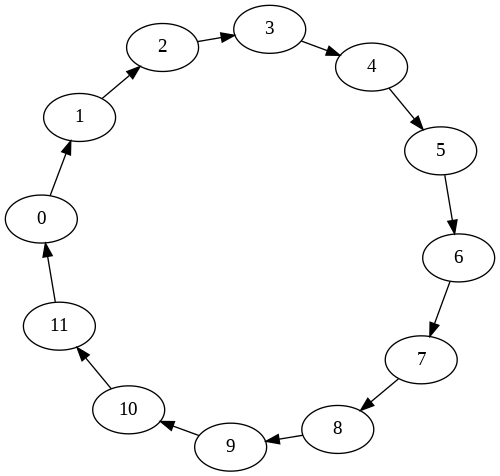

In [ ]:
lattice_map=CouplingMap.from_ring(
    num_spins,
    bidirectional=False
)
lattice_map.draw()

In [ ]:
edgelist=lattice_map.graph.edge_list()

hamlist=[]

for edge in edgelist:
    hamlist.append(("XX",edge,1.))
    hamlist.append(("YY",edge,1.))
    hamlist.append(("ZZ",edge,anisotropy))

for qubit in lattice_map.physical_qubits:
    hamlist.append(("X",[qubit],h))

hamiltonian=SparsePauliOp.from_sparse_list(
    hamlist,
    num_qubits=num_spins,
)

In [ ]:
print(*hamlist,sep="\n")

('XX', (0, 1), 1.0)
('YY', (0, 1), 1.0)
('ZZ', (0, 1), 1.0)
('XX', (1, 2), 1.0)
('YY', (1, 2), 1.0)
('ZZ', (1, 2), 1.0)
('XX', (2, 3), 1.0)
('YY', (2, 3), 1.0)
('ZZ', (2, 3), 1.0)
('XX', (3, 4), 1.0)
('YY', (3, 4), 1.0)
('ZZ', (3, 4), 1.0)
('XX', (4, 5), 1.0)
('YY', (4, 5), 1.0)
('ZZ', (4, 5), 1.0)
('XX', (5, 6), 1.0)
('YY', (5, 6), 1.0)
('ZZ', (5, 6), 1.0)
('XX', (6, 7), 1.0)
('YY', (6, 7), 1.0)
('ZZ', (6, 7), 1.0)
('XX', (7, 8), 1.0)
('YY', (7, 8), 1.0)
('ZZ', (7, 8), 1.0)
('XX', (8, 9), 1.0)
('YY', (8, 9), 1.0)
('ZZ', (8, 9), 1.0)
('XX', (9, 10), 1.0)
('YY', (9, 10), 1.0)
('ZZ', (9, 10), 1.0)
('XX', (10, 11), 1.0)
('YY', (10, 11), 1.0)
('ZZ', (10, 11), 1.0)
('XX', (11, 0), 1.0)
('YY', (11, 0), 1.0)
('ZZ', (11, 0), 1.0)
('X', [0], 1.0)
('X', [1], 1.0)
('X', [2], 1.0)
('X', [3], 1.0)
('X', [4], 1.0)
('X', [5], 1.0)
('X', [6], 1.0)
('X', [7], 1.0)
('X', [8], 1.0)
('X', [9], 1.0)
('X', [10], 1.0)
('X', [11], 1.0)


In [ ]:
def build_hamiltonian(num_spins, anisotropy, h):
    pauli_list = []
    coeff_list = []

    for i in range(num_spins - 1):
        # XX interaction
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'X'
        pauli_string[i + 1] = 'X'
        pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(anisotropy)

        # YY interaction
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'Y'
        pauli_string[i + 1] = 'Y'
        pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(anisotropy)

        # ZZ interaction
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'Z'
        pauli_string[i + 1] = 'Z'
        pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(1)

    for i in range(num_spins):
        # Z field interaction
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'X'
        pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(h)

    # Create the SparsePauliOp
    hamiltonian = SparsePauliOp(pauli_list, coeffs=coeff_list)
    return hamiltonian
# Generate the Hamiltonian
build_hamiltonian(num_spins, anisotropy, h)

SparsePauliOp(['IIIIIIIIIIXX', 'IIIIIIIIIIYY', 'IIIIIIIIIIZZ', 'IIIIIIIIIXXI', 'IIIIIIIIIYYI', 'IIIIIIIIIZZI', 'IIIIIIIIXXII', 'IIIIIIIIYYII', 'IIIIIIIIZZII', 'IIIIIIIXXIII', 'IIIIIIIYYIII', 'IIIIIIIZZIII', 'IIIIIIXXIIII', 'IIIIIIYYIIII', 'IIIIIIZZIIII', 'IIIIIXXIIIII', 'IIIIIYYIIIII', 'IIIIIZZIIIII', 'IIIIXXIIIIII', 'IIIIYYIIIIII', 'IIIIZZIIIIII', 'IIIXXIIIIIII', 'IIIYYIIIIIII', 'IIIZZIIIIIII', 'IIXXIIIIIIII', 'IIYYIIIIIIII', 'IIZZIIIIIIII', 'IXXIIIIIIIII', 'IYYIIIIIIIII', 'IZZIIIIIIIII', 'XXIIIIIIIIII', 'YYIIIIIIIIII', 'ZZIIIIIIIIII', 'IIIIIIIIIIIX', 'IIIIIIIIIIXI', 'IIIIIIIIIXII', 'IIIIIIIIXIII', 'IIIIIIIXIIII', 'IIIIIIXIIIII', 'IIIIIXIIIIII', 'IIIIXIIIIIII', 'IIIXIIIIIIII', 'IIXIIIIIIIII', 'IXIIIIIIIIII', 'XIIIIIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j,

In [ ]:
from qc_grader.challenges.qgss_2024 import grade_lab4_ex1

grade_lab4_ex1(build_hamiltonian)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


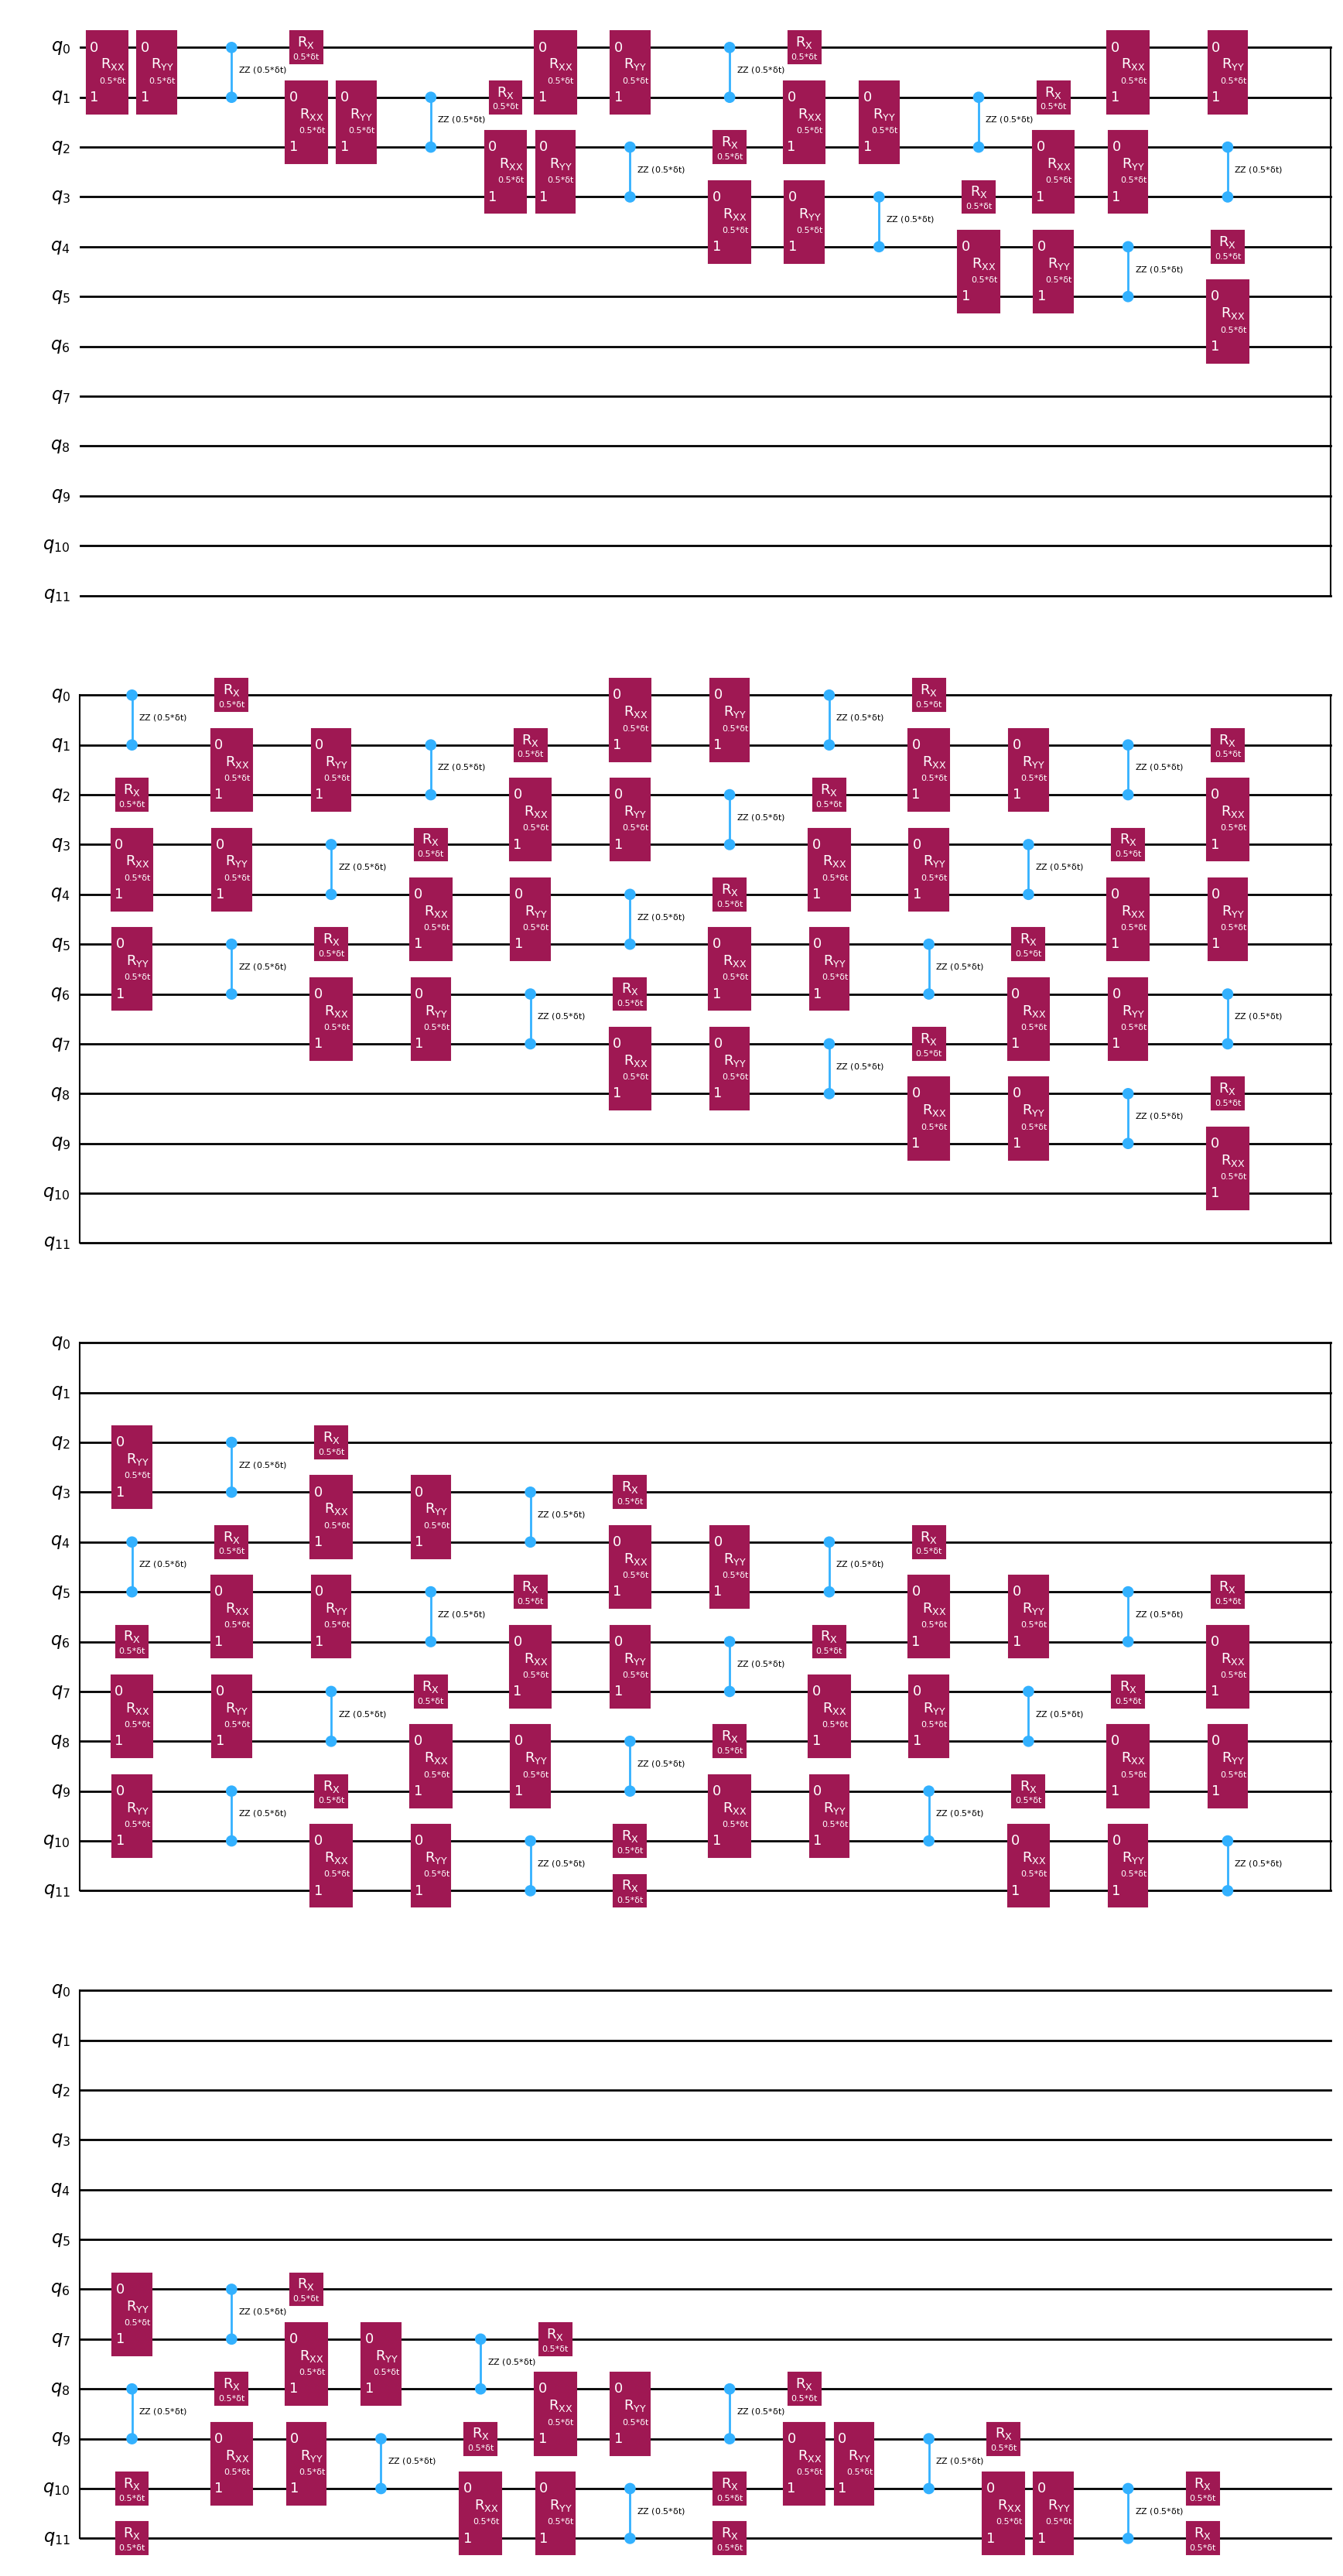

In [ ]:
hamiltonian=build_hamiltonian(
    num_spins,
    anisotropy,
    h
)
time_evolution_operator=PauliEvolutionGate(
    hamiltonian,
    time=dt,
)
trotter_factory=LieTrotter(reps=4)
evolution_circuit=trotter_factory.synthesize(
    time_evolution_operator,
)
evolution_circuit.decompose().draw(output="mpl")

In [ ]:

z_observables = [ SparsePauliOp.from_sparse_list([('Z', [i], 1.)],
                                                  num_qubits=num_spins) for i in range(num_spins) ]
print(*z_observables)

SparsePauliOp(['IIIIIIIIIIIZ'],
              coeffs=[1.+0.j]) SparsePauliOp(['IIIIIIIIIIZI'],
              coeffs=[1.+0.j]) SparsePauliOp(['IIIIIIIIIZII'],
              coeffs=[1.+0.j]) SparsePauliOp(['IIIIIIIIZIII'],
              coeffs=[1.+0.j]) SparsePauliOp(['IIIIIIIZIIII'],
              coeffs=[1.+0.j]) SparsePauliOp(['IIIIIIZIIIII'],
              coeffs=[1.+0.j]) SparsePauliOp(['IIIIIZIIIIII'],
              coeffs=[1.+0.j]) SparsePauliOp(['IIIIZIIIIIII'],
              coeffs=[1.+0.j]) SparsePauliOp(['IIIZIIIIIIII'],
              coeffs=[1.+0.j]) SparsePauliOp(['IIZIIIIIIIII'],
              coeffs=[1.+0.j]) SparsePauliOp(['IZIIIIIIIIII'],
              coeffs=[1.+0.j]) SparsePauliOp(['ZIIIIIIIIIII'],
              coeffs=[1.+0.j])


In [ ]:
def build_layered_hamiltonian(num_spins, anisotropy, h):
    even_pauli_list = []
    odd_pauli_list = []
    coeff_list = []

    for i in range(0, num_spins - 1, 2):  # Even pairs
        # XX interaction
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'X'
        pauli_string[i + 1] = 'X'
        even_pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(anisotropy)

        # YY interaction
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'Y'
        pauli_string[i + 1] = 'Y'
        even_pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(anisotropy)

        # ZZ interaction
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'Z'
        pauli_string[i + 1] = 'Z'
        even_pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(1.0)

    for i in range(1, num_spins - 1, 2):  # Odd pairs
        # XX interaction
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'X'
        pauli_string[i + 1] = 'X'
        odd_pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(anisotropy)

        # YY interaction
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'Y'
        pauli_string[i + 1] = 'Y'
        odd_pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(anisotropy)

        # ZZ interaction
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'Z'
        pauli_string[i + 1] = 'Z'
        odd_pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(1.0)

    for i in range(num_spins):  # Field interactions
        pauli_string = ['I'] * num_spins
        pauli_string[i] = 'X'
        even_pauli_list.append(''.join(reversed(pauli_string)))
        coeff_list.append(h)

    # Combine even and odd Pauli lists
    all_paulis = even_pauli_list + odd_pauli_list

    # Create the SparsePauliOp
    hamiltonian = SparsePauliOp.from_list(list(zip(all_paulis, coeff_list)))

    return hamiltonian

In [ ]:
from qc_grader.challenges.qgss_2024 import grade_lab4_ex2

grade_lab4_ex2(build_layered_hamiltonian)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="",
    set_as_default=True,
    overwrite=True
)
service = QiskitRuntimeService()
backend=service.backend("ibm_osaka")


pm=generate_preset_pass_manager(backend=backend,optimization_level=3)

isa_circuit=pm.run(evolution_circuit)

layout=isa_circuit.layout

isa_z_obs=[abs_obs.apply_layout(layout=layout) for abs_obs in z_observables ]

In [ ]:
from qc_grader.challenges.qgss_2024 import grade_lab4_ex3

grade_lab4_ex3(
    backend,
    isa_circuit,
    isa_z_obs
)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
dd_options=DynamicalDecouplingOptions(enable=True,
                                      sequence_type="XpXm")
options=EstimatorOptions(
    dynamical_decoupling=dd_options
)
options.resilience.zne_mitigation=True
options

max_execution_time,Unset
default_precision,Unset
default_shots,Unset
optimization_level,Unset
resilience_level,Unset
seed_estimator,Unset
experimental,Unset
▸environment,EnvironmentOptions
log_level,'WARNING'
callback,None
job_tags,None


In [ ]:
dt = Parameter('δt')
dt_val = [5*np.pi/2.]
h_vals = np.linspace(0., np.pi/2, 12)
anisotropies = {"Anisotropic":-5., "XXX":1}
num_spins = 50

# Dictionaries to use for exercise submission
hamiltonians = {}
time_evolution_operators = {}
trotter_circuits = {}
isa_circuits = {}
isa_z_observables = {}

In [ ]:
backend=service.least_busy(
    operational=True,
    simulator=False
)

In [ ]:
for phase, anisotropy in anisotropies.items():
    # Initialize lists for each phase
    hamiltonians[phase] = []
    time_evolution_operators[phase] = []
    trotter_circuits[phase] = []
    isa_circuits[phase] = []
    isa_z_observables[phase] = []

    for h in h_vals:
        # 1. Generate the Hamiltonian
        hamiltonian = build_layered_hamiltonian(num_spins, anisotropy, h)
        hamiltonians[phase].append(hamiltonian)

        # 2. Create the time evolution operator
        time_evolution_operator = PauliEvolutionGate(hamiltonian, dt)
        time_evolution_operators[phase].append(time_evolution_operator)

        # 3. Generate the time evolution circuit
        circuit = QuantumCircuit(num_spins)
        circuit.append(time_evolution_operator, range(num_spins))
        trotter_circuits[phase].append(circuit)

        # 4. Transpile the circuit
        # Define backend (example: Qiskit simulator, replace with your actual backend)
        pm=generate_preset_pass_manager(backend=backend,
                                        optimization_level=3)
        transpiled_circuit = pm.run(circuit)
        layout=transpiled_circuit.layout

        isa_circuits[phase].append(transpiled_circuit)

        # 5. Create observables for each site
        z_observables = [SparsePauliOp.from_list([(''.join(['I'] * i + ['Z'] + ['I'] * (num_spins - i - 1)), 1.0)]) for i in range(num_spins)]
        isa_z_observables_sep=isa_z_obs=[abs_obs.apply_layout(layout=layout) for abs_obs in z_observables ]
        isa_z_observables[phase].append(isa_z_observables_sep)

In [ ]:
from qc_grader.challenges.qgss_2024 import grade_lab4_ex4

grade_lab4_ex4(hamiltonians,
              time_evolution_operators,
              isa_circuits,
              isa_z_observables)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
all_z_obs_pubs={}
dt_val = [5*np.pi/2.]
for phase,circuits in isa_circuits.items():
    pubs=[]
    for circuit,observables in zip(circuits,isa_z_observables[phase]):
        pub=(circuit,observables, dt_val)
        pubs.append(pub)
    all_z_obs_pubs[phase]=pubs


In [ ]:
all_z_obs_pubs

{'Anisotropic': [(<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x78f0f10f0880>,
   [SparsePauliOp(['IIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
                  coeffs=[1.+0.j]),
    SparsePauliOp(['IIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
                  coeffs=[1.+0.j]),
    SparsePauliOp(['IIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
                  coeffs=[1.+0.j]),
    SparsePauliOp(['IIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
                  coeffs=[1.+0.j]),
    SparsePauliOp(['IIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
                 

In [ ]:
from qc_grader.challenges.qgss_2024 import grade_lab4_ex5

grade_lab4_ex5(all_z_obs_pubs)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
all_z_obs_jobs={}
count=1
with Batch(backend=backend) as batch:
    print(f"Session ID: {batch.session_id}")
    print(f"Backend:: {batch.backend()}")

    estimator=EstimatorV2(mode=batch,options=options)

    for phase,pubs in all_z_obs_pubs.items():
        job_ids=[]
        for circuit,observables,params in pubs:
            job=estimator.run([(circuit, observables, [params])])
            job_ids.append(job.job_id())
            print(f"Job Id for iteration {count}: {job.job_id()}")
            count+=1
        all_z_obs_jobs[phase]=job_ids


Session ID: cthxbzzsj17g0081bh8g
Backend:: ibm_kyoto
Job Id for iteration 1: cthxc00907y0008vm2a0
Job Id for iteration 2: cthxc0g4gjh0008nt5cg
Job Id for iteration 3: cthxc0rsj17g0081bh9g
Job Id for iteration 4: cthxc10907y0008vm2ag
Job Id for iteration 5: cthxc1gsj17g0081bhb0
Job Id for iteration 6: cthxc1r4gzyg008ytyh0
Job Id for iteration 7: cthxc204gjh0008nt5d0
Job Id for iteration 8: cthxc2g907y0008vm2b0
Job Id for iteration 9: cthxc2rsj17g0081bhbg
Job Id for iteration 10: cthxc30x7b5g008zv72g
Job Id for iteration 11: cthxc384gjh0008nt5dg
Job Id for iteration 12: cthxc40x7b5g008zv73g
Job Id for iteration 13: cthxc484gjh0008nt5e0
Job Id for iteration 14: cthxc4gx7b5g008zv740
Job Id for iteration 15: cthxc4r4gzyg008ytyhg
Job Id for iteration 16: cthxc586g3rg0086r1y0
Job Id for iteration 17: cthxc5gx7b5g008zv74g
Job Id for iteration 18: cthxc5r4gjh0008nt5eg
Job Id for iteration 19: cthxc60sj17g0081bhcg
Job Id for iteration 20: cthxc6gx7b5g008zv75g
Job Id for iteration 21: cthxc6rsj17

In [ ]:
fname=r"C:\Users\Dylan\Downloads\ibm_osaka_heisenberg.txt"

In [ ]:
with open(fname,"w") as file:
    json.dump(all_z_obs_jobs,file)

In [ ]:


from qc_grader.challenges.qgss_2024 import grade_lab4_ex6

grade_lab4_ex6(fname)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
from qc_grader.challenges.qgss_2024 import lab4_ex7_get_data
from qc_grader.challenges.qgss_2024 import grade_lab4_ex7

from collections import defaultdict

all_job_data=lab4_ex7_get_data()
# Create a function to parse the primitive data correctly
def parse_primitive_data(raw_data):
    expectation = {"Anisotropic":[],"XXX":[]}
    for key, results in raw_data.items():
        for result in results:
            # Access the PubResult object within the PrimitiveResult
            pub_result = result[0]  # Assuming there's only one PubResult object in the list
            # Extract the evs from the DataBin object within PubResult
            evs = pub_result.data.evs
            expectation[key].append(list(evs))
    return expectation

parsed_data = parse_primitive_data(all_job_data)

In [ ]:
grade_lab4_ex7(all_job_data)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
avg_z_data={"Anisotropic":[],"XXX":[]}
for k,v in parsed_data.items():
    for element in v:
        Sum=sum(element)
        avg=Sum/len(element)
        avg_z_data[k].append(avg)
avg_z_data

{'Anisotropic': [1.0571992061683428,
  0.8195324067963662,
  0.4519219277091532,
  0.46978441502035984,
  0.36268768443315436,
  0.9522244967978775,
  1.0258081047122423,
  0.6772198364539402,
  0.4880509175650519,
  0.31236424516866973,
  0.6614865271141174,
  1.0262948772916776],
 'XXX': [1.0648961037703983,
  -0.4657166462045293,
  0.38524972324980034,
  0.8673386516247455,
  -0.15845730214355597,
  0.394097976902221,
  0.6007834776833597,
  -0.7743544283366827,
  0.8379233111688361,
  0.2563400547508905,
  -0.6396596243944014,
  0.9856188130956747]}

In [ ]:
from qc_grader.challenges.qgss_2024 import grade_lab4_ex8

grade_lab4_ex8({'Anisotropic':avg_z_data['Anisotropic'],
                'XXX':avg_z_data['XXX']})

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
import matplotlib.pyplot as plt

anisotropic_data=avg_z_data["Anisotropic"]
xxx_data=avg_z_data["XXX"]

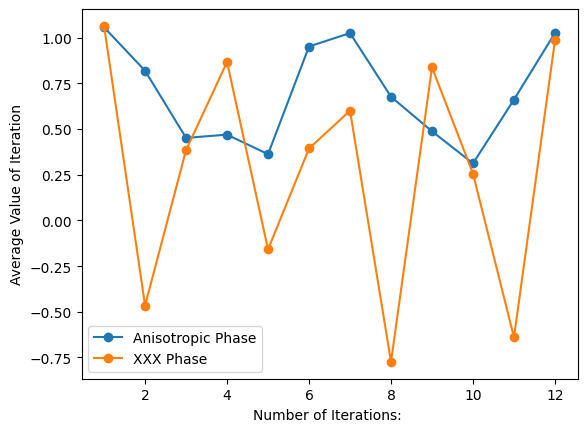

In [ ]:
iter=[i for i in range (1,len(anisotropic_data)+1)]

plt.plot(iter,anisotropic_data,"o-",label="Anisotropic Phase")
plt.plot(iter,xxx_data,"o-",label="XXX Phase")

plt.legend()
plt.xlabel("Number of Iterations: ")
plt.ylabel("Average Value of Iteration")
plt.show()